In [49]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene, shapiro
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [33]:
df = pd.read_csv('/content/drive/MyDrive/Csv folder/Diet Type and Exercise Intensity on Weight Loss.csv')

print(df.head())


   Participant Diet Type Exercise Intensity  Weight Loss (kg)
0            1  Low-Carb      Low Intensity               2.5
1            2  Low-Carb      Low Intensity               2.8
2            3  Low-Carb      Low Intensity               2.9
3            4  Low-Carb      Low Intensity               3.0
4            5  Low-Carb      Low Intensity               2.7


In [37]:
grouped = df.groupby(['Diet Type', 'Exercise Intensity'])

for name, group in grouped:
    stat, p_value = shapiro(group['Weight Loss (kg)'])
    print(f'Shapiro-Wilk test for {name}: W={stat}, p={p_value}')

Shapiro-Wilk test for ('Low-Carb', 'High Intensity'): W=0.9523514916285045, p=0.7539729964660309
Shapiro-Wilk test for ('Low-Carb', 'Low Intensity'): W=0.9787161500642191, p=0.9276364233495382
Shapiro-Wilk test for ('Low-Fat', 'High Intensity'): W=0.9867621552115592, p=0.9671739349728593
Shapiro-Wilk test for ('Low-Fat', 'Low Intensity'): W=0.986762155211559, p=0.9671739349728582


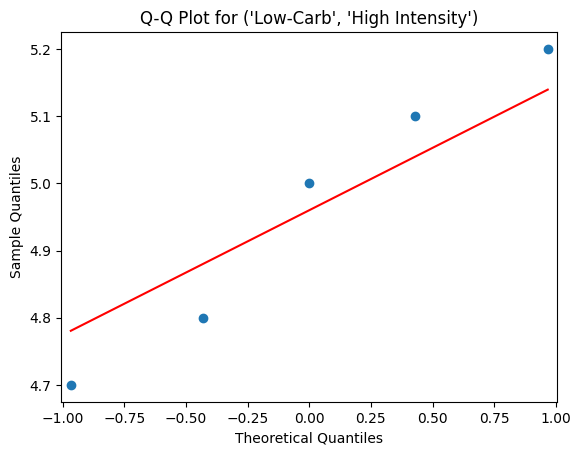

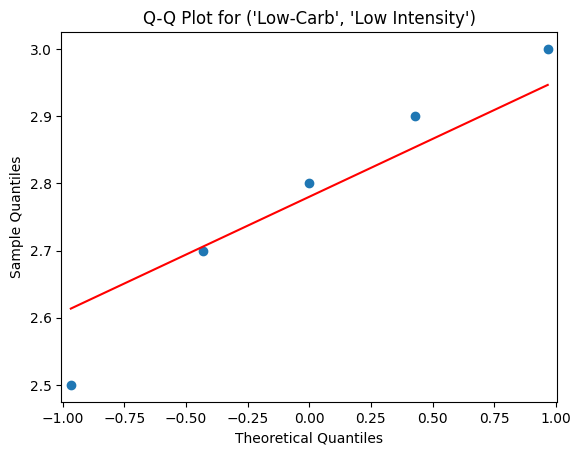

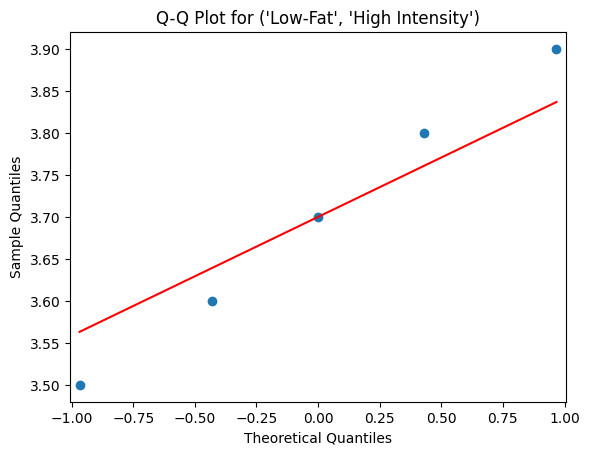

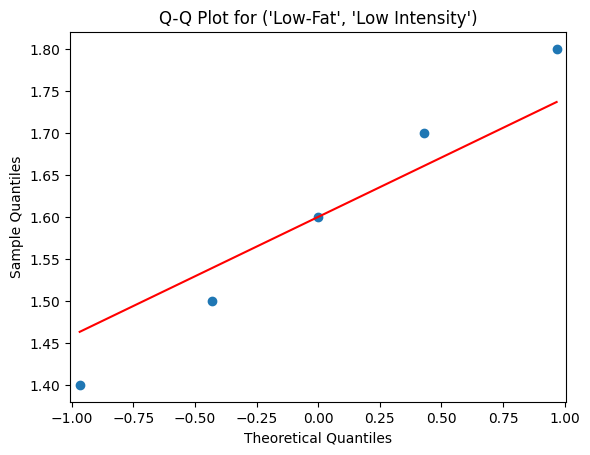

In [39]:
for name, group in grouped:
    qqplot(group['Weight Loss (kg)'], line='s')
    plt.title(f'Q-Q Plot for {name}')
    plt.show()

In [40]:
stat, p_value = levene(df['Weight Loss (kg)'][df['Diet Type'] == 'Low-Carb'],
                       df['Weight Loss (kg)'][df['Diet Type'] == 'Low-Fat'],
                       df['Weight Loss (kg)'][df['Exercise Intensity'] == 'Low Intensity'],
                       df['Weight Loss (kg)'][df['Exercise Intensity'] == 'High Intensity'])

print(f'Levene’s test for homogeneity of variance: W={stat}, p={p_value}')


Levene’s test for homogeneity of variance: W=23.93264733395697, p=1.078466895601473e-08


In [47]:
df.rename(columns={'Diet Type': 'Diet_Type', 'Exercise Intensity': 'Exercise_Intensity', 'Weight Loss (kg)': 'Weight_Loss'}, inplace=True)

model = ols('Weight_Loss ~ C(Diet_Type) + C(Exercise_Intensity) + C(Diet_Type):C(Exercise_Intensity)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                                    sum_sq    df           F        PR(>F)
C(Diet_Type)                         7.442   1.0  228.984615  6.697960e-11
C(Exercise_Intensity)               22.898   1.0  704.553846  1.172348e-14
C(Diet_Type):C(Exercise_Intensity)   0.008   1.0    0.246154  6.265427e-01
Residual                             0.520  16.0         NaN           NaN


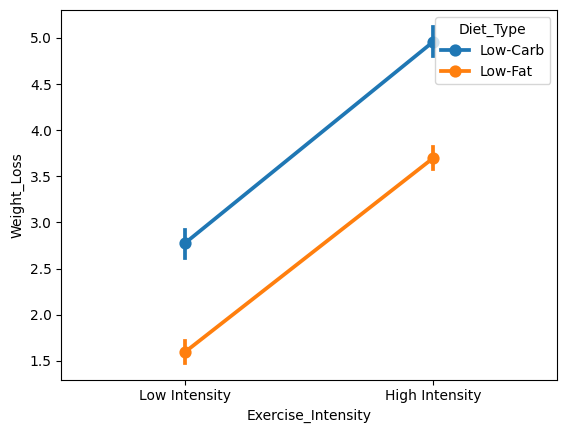

In [48]:
sns.pointplot(x='Exercise_Intensity', y='Weight_Loss', hue='Diet_Type', data=df)
plt.show()

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
          group1                   group2          meandiff p-adj  lower   upper  reject
----------------------------------------------------------------------------------------
Low-Carb & High Intensity Low-Carb & Low Intensity    -2.18   0.0 -2.5062 -1.8538   True
Low-Carb & High Intensity Low-Fat & High Intensity    -1.26   0.0 -1.5862 -0.9338   True
Low-Carb & High Intensity  Low-Fat & Low Intensity    -3.36   0.0 -3.6862 -3.0338   True
 Low-Carb & Low Intensity Low-Fat & High Intensity     0.92   0.0  0.5938  1.2462   True
 Low-Carb & Low Intensity  Low-Fat & Low Intensity    -1.18   0.0 -1.5062 -0.8538   True
 Low-Fat & High Intensity  Low-Fat & Low Intensity     -2.1   0.0 -2.4262 -1.7738   True
----------------------------------------------------------------------------------------


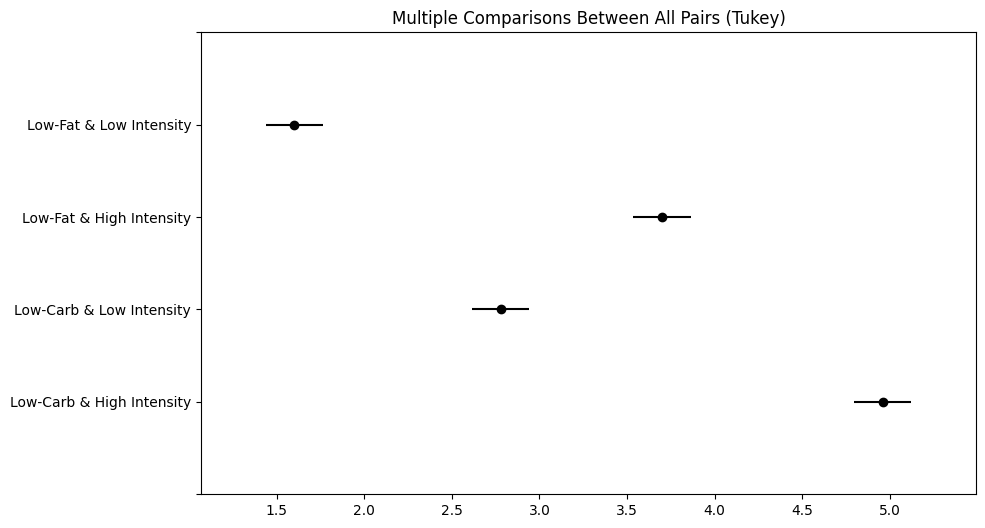

In [50]:
tukey = pairwise_tukeyhsd(endog=df['Weight_Loss'],
                          groups=df['Diet_Type'] + " & " + df['Exercise_Intensity'],
                          alpha=0.05)

print(tukey)

tukey.plot_simultaneous()
plt.show()